# Task 2: Data Insights
In this module, the objective was to gather insights about potential customers by studying their past behavior. Data analysis strategies were developed, considering factors such as age distribution, number of purchases in the last three years, job industry category, wealth segment, and number of cars owned. A presentation was created to showcase the data analysis strategies and their results, helping the client identify their target customers.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.ExcelFile("KPMG_VI_New_raw_data_update_final one.xlsx")

In [2]:
#reading of each file seperatly
Transactions=pd.read_excel(Data, 'Transactions')
NewCustomerList=pd.read_excel(Data, 'NewCustomerList')
CustomerDemographic=pd.read_excel(Data, 'CustomerDemographic')
CustomerAddress=pd.read_excel(Data, 'CustomerAddress')

C:\Users\hp\AppData\Local\Temp\ipykernel_12012\2500845031.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList=pd.read_excel(Data, 'NewCustomerList')
C:\Users\hp\AppData\Local\Temp\ipykernel_12012\2500845031.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic=pd.read_excel(Data, 'CustomerDemographic')


## New CustomerList Dataset

In [3]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.00,1.0000,1.250000,1.062500,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.57,0.5700,0.570000,0.570000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.41,0.4100,0.512500,0.512500,4,4,1.703125


In [4]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [5]:
#Drop the unnamed column
NewCustomerList.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)

In [6]:
NewCustomerList.shape

(1000, 18)

In [7]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [8]:
NewCustomerList.duplicated().sum()

0

In [9]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   319
dtype: int64

In [10]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [11]:
NewCustomerList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [12]:
NewCustomerList[NewCustomerList.gender=='U']

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [13]:
NewCustomerList['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [14]:
NewCustomerList['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [15]:
NewCustomerList['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [16]:
NewCustomerList['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [17]:
NewCustomerList['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [18]:
import pandas as pd
from datetime import datetime

# Convert DOB column to datetime
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])

# Calculate age based on current date
current_year = datetime.now().year
NewCustomerList['Age'] = current_year - NewCustomerList['DOB'].dt.year

# Define age group ranges and labels
age_ranges = [10, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Categorize individuals into age groups
NewCustomerList['Age Group'] = pd.cut(NewCustomerList['Age'], bins=age_ranges, labels=age_labels, right=False)

# Perform analysis using the age groups
age_group_counts = NewCustomerList['Age Group'].value_counts()
average_bike_purchases_by_age_group = NewCustomerList.groupby('Age Group')['past_3_years_bike_related_purchases'].mean()

# Print the results
print("Age Group Counts:")
print(age_group_counts)
print("\nAverage Bike Purchases by Age Group:")
print(average_bike_purchases_by_age_group)

Age Group Counts:
41-50    206
51-60    184
71+      177
61-70    175
21-30    134
31-40    107
10-20      0
Name: Age Group, dtype: int64

Average Bike Purchases by Age Group:
Age Group
10-20          NaN
21-30    48.888060
31-40    53.028037
41-50    50.179612
51-60    50.478261
61-70    49.171429
71+      48.146893
Name: past_3_years_bike_related_purchases, dtype: float64


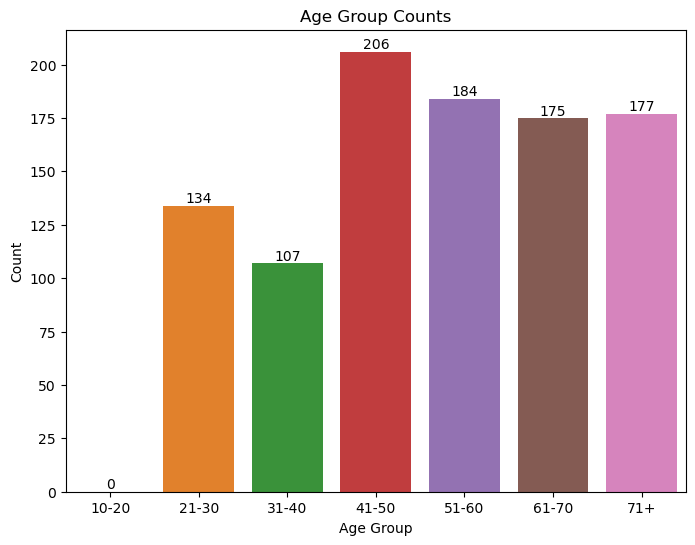

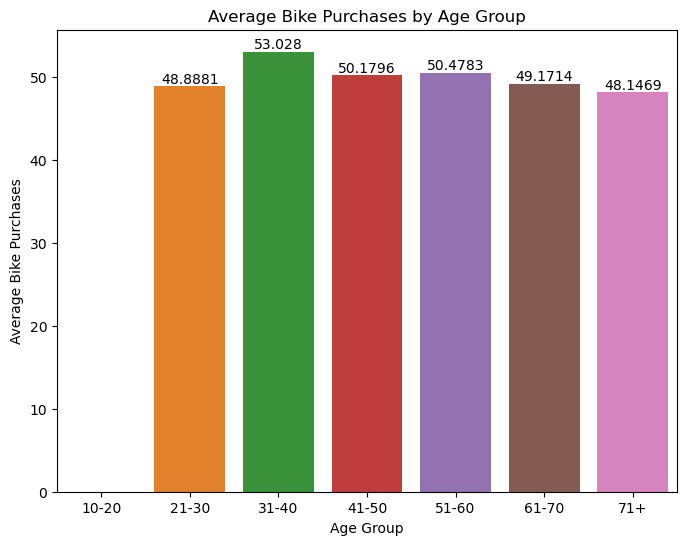

In [29]:
# Create bar plot for Age Group Counts
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Age Group Counts')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Create bar plot for Average Bike Purchases by Age Group
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=average_bike_purchases_by_age_group.index, y=average_bike_purchases_by_age_group.values)
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Average Bike Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Bike Purchases')
plt.show()

In [20]:
# Group the data by job industry category and calculate the total bike-related purchases
industry_purchases = NewCustomerList.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()

# Sort the industries in descending order of total bike-related purchases
industry_purchases = industry_purchases.sort_values(ascending=False)

# Print the result
print("Bike-Related Purchases by Industry:")
print(industry_purchases)

Bike-Related Purchases by Industry:
job_industry_category
Financial Services    10564
Manufacturing          9562
Health                 7421
Retail                 4225
Property               3033
IT                     2688
Entertainment          1953
Argiculture            1323
Telecommunications     1250
Name: past_3_years_bike_related_purchases, dtype: int64


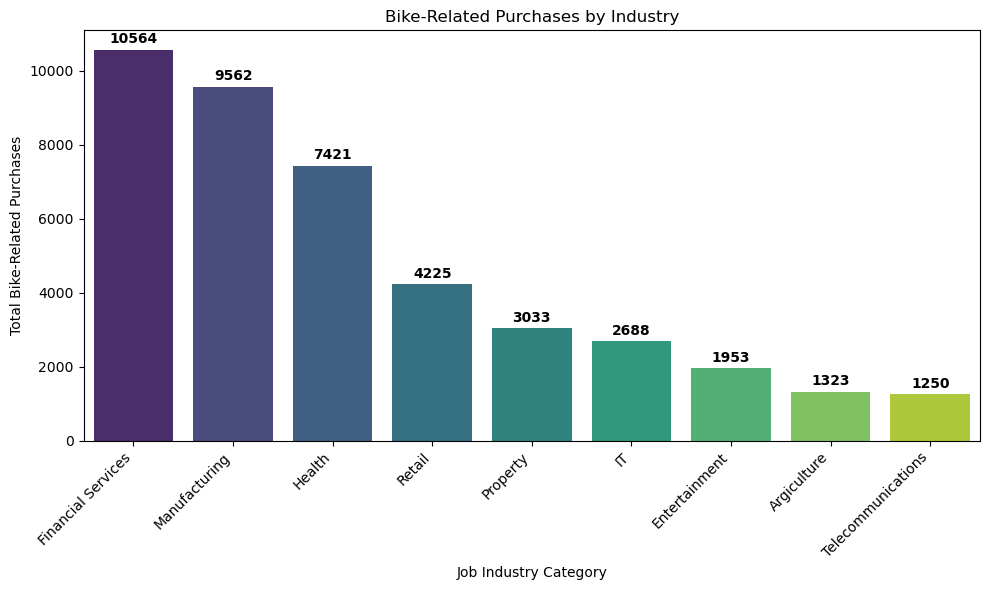

In [21]:
# Create bar plot for Bike-Related Purchases by Industry
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=industry_purchases.index, y=industry_purchases.values, palette="viridis")

# Add data labels on top of each bar
for i, v in enumerate(industry_purchases.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Bike-Related Purchases by Industry')
plt.xlabel('Job Industry Category')
plt.ylabel('Total Bike-Related Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Group the data by gender category and calculate the total bike-related purchases
gender_purchases = NewCustomerList.groupby('gender')['past_3_years_bike_related_purchases'].sum()

# Sort the genders in descending order of total bike-related purchases
gender_purchases = gender_purchases.sort_values(ascending=False)

# Print the result
print("Bike-Related Purchases by Gender:")
print(gender_purchases)


Bike-Related Purchases by Gender:
gender
Female    25212
Male      23765
U           859
Name: past_3_years_bike_related_purchases, dtype: int64


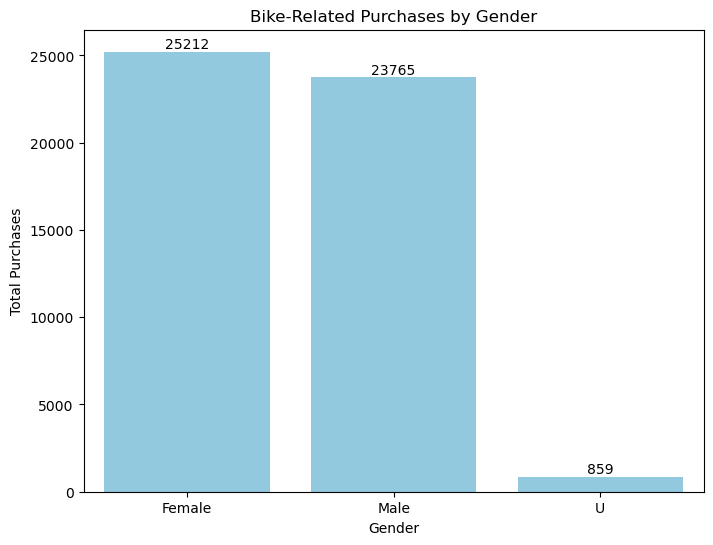

In [30]:
# Group the data by gender category and calculate the total bike-related purchases
gender_purchases = NewCustomerList.groupby('gender')['past_3_years_bike_related_purchases'].sum()

# Sort the genders in descending order of total bike-related purchases
gender_purchases = gender_purchases.sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_purchases.index, y=gender_purchases.values, color='skyblue')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Bike-Related Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchases')

plt.show()


In [24]:
# Group the data by state and calculate car ownership counts
car_ownership =  NewCustomerList.groupby('state')['owns_car'].value_counts().unstack().fillna(0)

# Print the result
print("Car Ownership by State:")
print(car_ownership)

Car Ownership by State:
owns_car   No  Yes
state             
NSW       272  234
QLD       103  125
VIC       132  134


<Figure size 1000x600 with 0 Axes>

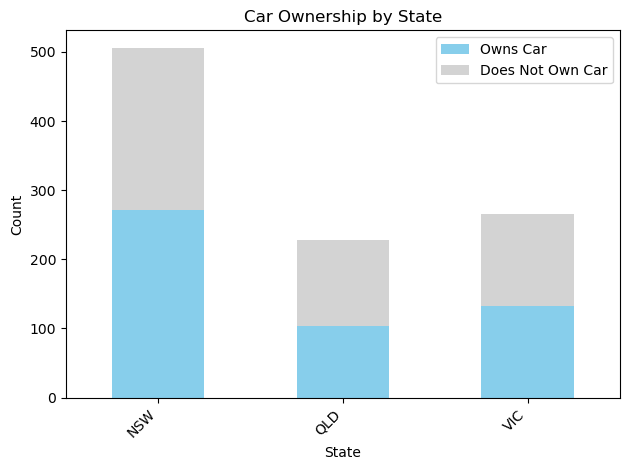

In [25]:
# Create column bar plot for Car Ownership by State
plt.figure(figsize=(10, 6))
car_ownership.plot(kind='bar', stacked=True, color=['skyblue', 'lightgray'])
plt.title('Car Ownership by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(['Owns Car', 'Does Not Own Car'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [26]:
# Group the data by age group and wealth segment, and calculate the count
age_wealth_segment = NewCustomerList.groupby(['Age Group', 'wealth_segment']).size()

# Sort the data in descending order
age_wealth_segment = age_wealth_segment.sort_values(ascending=False)

# Print the result
print("Wealth Segment Distribution by Age Group:")
print(age_wealth_segment)


Wealth Segment Distribution by Age Group:
Age Group  wealth_segment   
41-50      Mass Customer        103
51-60      Mass Customer        102
61-70      Mass Customer         91
71+        Mass Customer         87
21-30      Mass Customer         63
31-40      Mass Customer         53
41-50      High Net Worth        52
           Affluent Customer     51
61-70      High Net Worth        49
71+        High Net Worth        47
51-60      Affluent Customer     45
71+        Affluent Customer     43
21-30      Affluent Customer     41
51-60      High Net Worth        37
61-70      Affluent Customer     35
31-40      High Net Worth        34
21-30      High Net Worth        30
31-40      Affluent Customer     20
10-20      High Net Worth         0
           Mass Customer          0
           Affluent Customer      0
dtype: int64


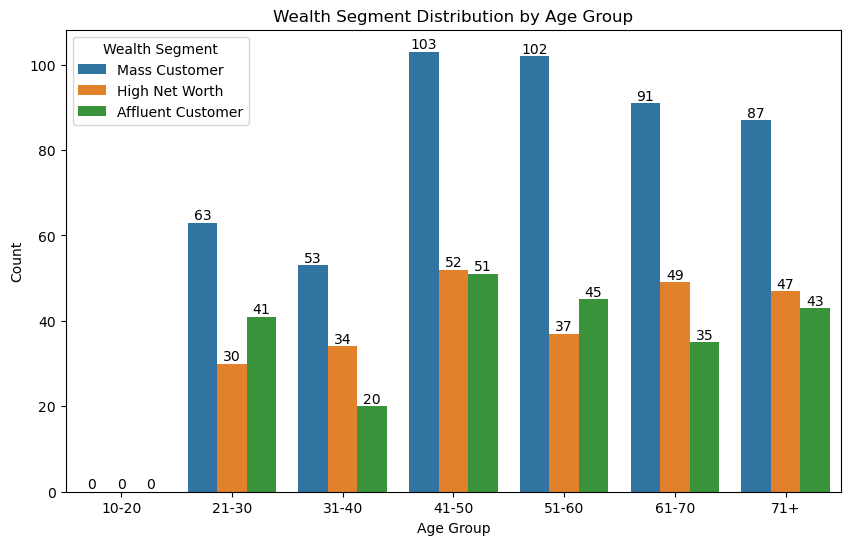

In [31]:
# Group the data by age group and wealth segment, and calculate the count
age_wealth_segment = NewCustomerList.groupby(['Age Group', 'wealth_segment']).size()

# Sort the data in descending order
age_wealth_segment = age_wealth_segment.sort_values(ascending=False)

# Reset the index to make the grouped columns accessible for plotting
age_wealth_segment = age_wealth_segment.reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=age_wealth_segment, x='Age Group', y='count', hue='wealth_segment')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Wealth Segment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Wealth Segment')

plt.show()
